In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pickle
import joblib


In [2]:
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,51,37,20.879744,82.002744,6.502985,202.935536,rice
1,62,52,35,21.770462,80.319644,7.038096,226.655537,rice
2,81,45,39,23.004459,82.320763,7.840207,263.964248,rice
3,100,39,39,26.491096,80.158363,6.980401,242.864034,rice
4,91,44,35,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,94,26,55,25.287846,89.636679,6.765095,58.286977,watermelon
2196,104,18,51,26.638386,84.695469,6.189214,48.324286,watermelon
2197,89,30,55,25.331045,84.305338,6.904242,41.532187,watermelon
2198,91,13,48,26.897502,83.892415,6.463271,43.971937,watermelon
2199,111,10,54,26.986037,89.413849,6.260839,58.548767,watermelon


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'mungbean', 'maize', 'lentil', 'jute', 'coffee', 'cotton',
       'kidneybeans', 'mothbeans', 'coconut', 'blackgram', 'pigeonpeas',
       'chickpea', 'banana', 'grapes', 'apple', 'mango', 'muskmelon',
       'orange', 'papaya', 'pomegranate', 'watermelon'], dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

label
rice           100
mungbean       100
pomegranate    100
papaya         100
orange         100
muskmelon      100
mango          100
apple          100
grapes         100
banana         100
chickpea       100
pigeonpeas     100
blackgram      100
coconut        100
mothbeans      100
kidneybeans    100
cotton         100
coffee         100
jute           100
lentil         100
maize          100
watermelon     100
Name: count, dtype: int64

<h3>Seperating features and target label</h3>

In [11]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

In [12]:
#accuracy and model name
acc = []
model = []

In [13]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

<h2>Decision tree</h2>

In [14]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('Decision Tree')         #model name
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  85.22727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        15
   blackgram       0.65      1.00      0.79        17
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      0.94      0.97        17
      coffee       1.00      0.95      0.97        19
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        23
        jute       0.00      0.00      0.00        18
 kidneybeans       1.00      0.62      0.77        16
      lentil       0.82      1.00      0.90        14
       maize       0.74      0.95      0.83        21
       mango       1.00      0.10      0.19        29
   mothbeans       1.00      0.48      0.65        23
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00

c:\Users\BUTALOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\BUTALOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\BUTALOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [15]:
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.92954545, 0.93181818, 0.91136364, 0.91363636, 0.94318182])

<b>Saving the trained Decision tree model</b>

In [16]:
DT_pkl = open('../Saved-Models/DecisionTree.joblib', 'wb')
joblib.dump(DecisionTree, DT_pkl)
DT_pkl.close()

<h2>Guassian Naive Bayes</h2>

In [17]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('Naive Bayes')           #model name
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        17
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        19
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        23
        jute       0.82      1.00      0.90        18
 kidneybeans       1.00      1.00      1.00        16
      lentil       1.00      1.00      1.00        14
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      1.00      1.00        23
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00  

In [18]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([1.        , 0.99772727, 0.99545455, 0.99545455, 0.99090909])

<b>Saving the trained Naive Bayes model</b>

In [19]:
NB_pkl = open('../Saved-Models/NaiveBayes.joblib', 'wb')
joblib.dump(NaiveBayes, NB_pkl)
NB_pkl.close()

<h2>Support Vector Machine (SVM)</h2>

In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)

SVM = SVC(C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('SVM')                   #model name
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        15
   blackgram       0.81      1.00      0.89        17
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        19
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        23
        jute       0.78      1.00      0.88        18
 kidneybeans       1.00      1.00      1.00        16
      lentil       1.00      0.79      0.88        14
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      0.96      0.98        23
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.0

In [21]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.975     , 0.97954545, 0.97272727])

<b>Saving the trained SVM model</b>

In [22]:
SVM_pkl = open('../Saved-Models/SVMClassifier.joblib', 'wb')
joblib.dump(SVM, SVM_pkl)
SVM_pkl.close()

<h2>Random Forest</h2>

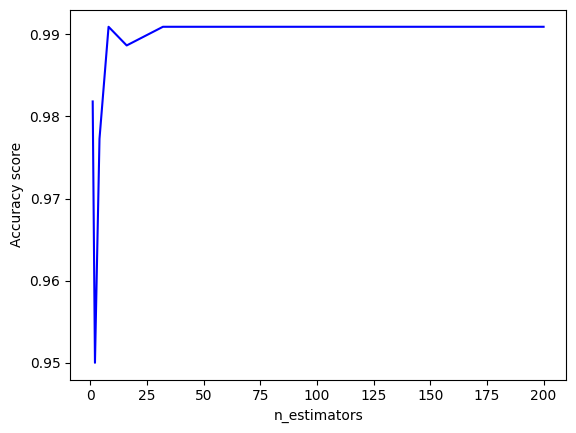

In [23]:
from sklearn.ensemble import RandomForestClassifier
acc_score = []
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for i in n_estimators:
    RF = RandomForestClassifier(n_estimators=i, random_state=2)
    RF.fit(Xtrain,Ytrain)
    predicted_values = RF.predict(Xtest)

    x = metrics.accuracy_score(Ytest, predicted_values)
    acc_score.append(x) 
    
plt.plot(n_estimators, acc_score, 'b', label='Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()                      

In [24]:
acc_score

[0.9818181818181818,
 0.95,
 0.9772727272727273,
 0.990909090909091,
 0.9886363636363636,
 0.990909090909091,
 0.990909090909091,
 0.990909090909091,
 0.990909090909091]

In [25]:
RF = RandomForestClassifier(n_estimators=16, random_state=2)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('RF')                   #model name
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        17
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        19
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        23
        jute       0.82      1.00      0.90        18
 kidneybeans       1.00      1.00      1.00        16
      lentil       0.93      1.00      0.97        14
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      0.96      0.98        23
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00

In [26]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99545455, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

<b>Saving the trained Random Forest model</b>

In [27]:
RF_pkl = open('../Saved-Models/RandomForest.joblib', 'wb')
joblib.dump(RF, RF_pkl)
RF_pkl.close()

<h2>K-Nearest Neighbour</h2>

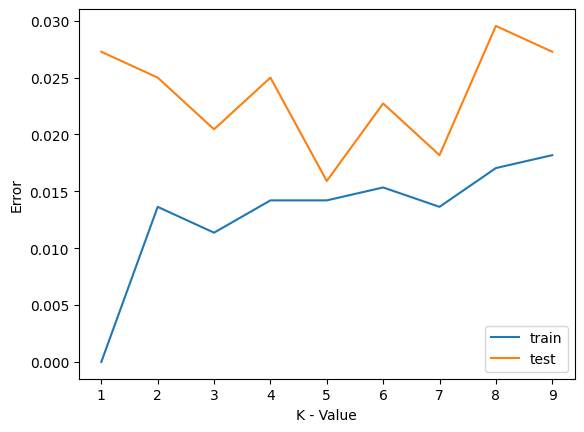

In [28]:
from sklearn.neighbors import KNeighborsClassifier 
error1=[]
error2=[]
for k in range(1,10):
  k_nn = KNeighborsClassifier(n_neighbors=k)
  k_nn.fit(Xtrain,Ytrain)
  y_pred1 = k_nn.predict(Xtrain)
  error1.append(np.mean(Ytrain!=y_pred1))
  y_pred2 = k_nn.predict(Xtest)
  error2.append(np.mean(Ytest!=y_pred2))
plt.plot(range(1,10),error1,label='train')
plt.plot(range(1,10),error2,label='test')
plt.xlabel('K - Value')
plt.ylabel('Error')
plt.legend()

In [29]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_norm,Ytrain)
predicted_values = knn.predict(X_test_norm)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('KNN')                   #model name
print("KNN's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

KNN's Accuracy is:  0.9659090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        15
   blackgram       0.81      1.00      0.89        17
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        19
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        23
        jute       0.82      1.00      0.90        18
 kidneybeans       1.00      1.00      1.00        16
      lentil       0.65      0.79      0.71        14
       maize       1.00      1.00      1.00        21
       mango       0.97      1.00      0.98        29
   mothbeans       1.00      0.70      0.82        23
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.0

In [30]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99545455, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

<b>Saving the trained Random Forest model</b>

In [31]:
KNN_pkl = open('../Saved-Models/KNN.joblib', 'wb')
joblib.dump(knn, KNN_pkl)
KNN_pkl.close()

<h2>Comparing models</h2>

C:\Users\BUTALOP\AppData\Local\Temp\ipykernel_20312\2464031616.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')
c:\Users\BUTALOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\BUTALOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\BUTALOP\A

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

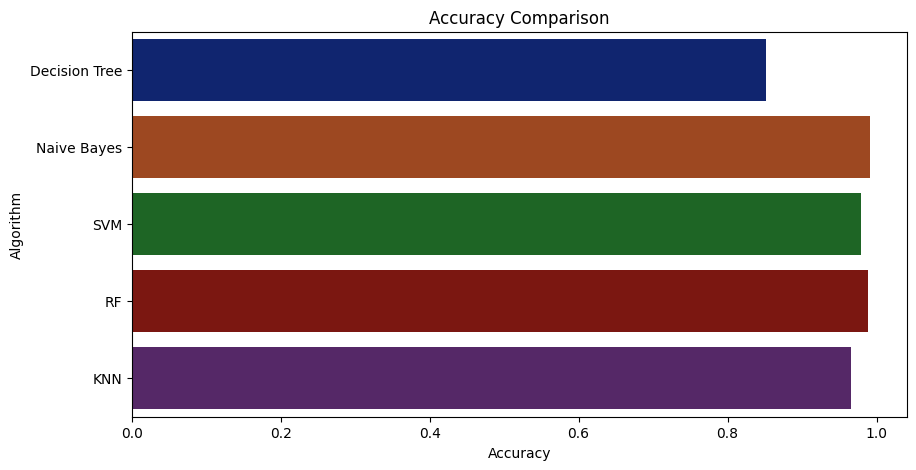

In [32]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [33]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.8522727272727273
Naive Bayes --> 0.990909090909091
SVM --> 0.9795454545454545
RF --> 0.9886363636363636
KNN --> 0.9659090909090909


In [34]:
#['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
data = np.array([[77,49,42,20,82,6.5,202]])
prediction = RF.predict(data)
print(prediction)

['rice']


c:\Users\BUTALOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
